# Imports

In [192]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from prettytable import PrettyTable

myparams = {
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}',
    'font.family': 'Djvu Serif',
    'font.size': 16,
    'axes.grid': True,
    'grid.alpha': 0.1,
    'lines.linewidth': 2
}
plt.rcParams.update(myparams)

%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

np.random.seed(307)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
from stuff import (
    get_means_variances,
    get_divergences_scores_eigvals,
    sufficient_sample_size,
    sufficient_vs_threshold,
    get_regression_results
)

from data import (
    synthetic_regression,
    synthetic_classification,
    liver_disorders,
    get_datasets_regression,
    get_datasets_regression_info
)

from visualize import (
    plot_eigvals,
    plot_means_variances,
    plot_divergences_scores,
    plot_sufficient_vs_threshold,
)

# Synthetic regression

In [82]:
# set number of samples and features in synthetic dataset
n_samples = 500
n_features = 10

In [83]:
X_regression, y_regression = synthetic_regression(n_samples, n_features)

In [84]:
# set parameters for prior distribution
alpha = 1
mu_0 = np.zeros(n_features)
Sigma_0 = 1 / alpha * np.identity(n_features)

In [85]:
num_sample_size = 1000

if X_regression.shape[0] - X_regression.shape[1] < num_sample_size:
    sample_sizes_regression = np.arange(X_regression.shape[1]+1, X_regression.shape[0]+1)[::-1]
else:
    sample_sizes_regression = np.linspace(X_regression.shape[1]+1, X_regression.shape[0], num_sample_size, dtype=int)[::-1]

means_regression, variances_regression = get_means_variances(X_regression, y_regression, num_sample_size=num_sample_size, 
                                                             task='regression', B=100)

divergences_regression, scores_regression, eigvals_regression = get_divergences_scores_eigvals(
    mu_0=mu_0,
    Sigma_0=Sigma_0,
    X=X_regression,
    y=y_regression,
    B=100,
    num_sample_size=num_sample_size
)

100%|██████████| 100/100 [00:09<00:00, 10.57it/s]


In [185]:
thresholds_regression = np.logspace(-3, 7, 1000)

sufficient_regression = sufficient_vs_threshold(sample_sizes=sample_sizes_regression[::-1],
                                                means=means_regression[::-1],
                                                variances=variances_regression[::-1],
                                                divergences=divergences_regression,
                                                scores=scores_regression,
                                                thresholds=thresholds_regression)

# Synthetic classification

In [176]:
# set number of samples and features in synthetic dataset
n_samples = 500
n_features = 10

In [177]:
X_classification, y_classification = synthetic_classification(n_samples, n_features)

In [178]:
num_sample_size = 1000

if X_classification.shape[0] - X_classification.shape[1] < num_sample_size:
    sample_sizes_classification = np.arange(X_classification.shape[1]+1, X_classification.shape[0]+1)[::-1]
else:
    sample_sizes_classification = np.linspace(X_classification.shape[1]+1, X_classification.shape[0], num_sample_size, dtype=int)[::-1]

means_classification, variances_classification = get_means_variances(X_classification, y_classification, num_sample_size=num_sample_size, 
                                                             task='regression', B=100)

100%|██████████| 490/490 [00:15<00:00, 31.50it/s]


In [186]:
thresholds_classification = np.logspace(-3, 7, 1000)

sufficient_classification = sufficient_vs_threshold(sample_sizes=sample_sizes_classification[::-1],
                                                means=means_classification[::-1],
                                                variances=variances_classification[::-1],
                                                thresholds=thresholds_classification,
                                                methods=['variance', 'rate'])

# Liver Disorders

In [181]:
X, y = liver_disorders()
n_samples = X.shape[0]
n_features = X.shape[1]

In [182]:
# set parameters for prior distribution
alpha = 1
mu_0 = np.zeros(n_features)
Sigma_0 = 1 / alpha * np.identity(n_features)

In [106]:
num_sample_size = 1000

if X.shape[0] - X.shape[1] < num_sample_size:
    sample_sizes = np.arange(X.shape[1]+1, X.shape[0]+1)[::-1]
else:
    sample_sizes = np.linspace(X.shape[1]+1, X.shape[0], num_sample_size, dtype=int)[::-1]

means, variances = get_means_variances(X, y, num_sample_size=num_sample_size, task='liver-disorders', B=1000)

divergences, scores, eigvals = get_divergences_scores_eigvals(
    mu_0=mu_0,
    Sigma_0=Sigma_0,
    X=X,
    y=y,
    B=1000,
    num_sample_size=num_sample_size
)

  0%|          | 0/340 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:24<00:00, 40.40it/s]


In [187]:
thresholds = np.logspace(-3, 7, 1000)

sufficient = sufficient_vs_threshold(sample_sizes=sample_sizes[::-1],
                                    means=means[::-1],
                                    variances=variances[::-1],
                                    divergences=divergences,
                                    scores=scores,
                                    thresholds=thresholds)

# Different datasets

In [194]:
datasets, datasets_names = get_datasets_regression()

100%|██████████| 13/13 [00:24<00:00,  1.86s/it]


In [195]:
variances_datasets = {}
means_datasets = {}
divergences_datasets = {}
scores_datasets = {}
num_sample_size = 50 # for computational simplicity
B = 100

for name in tqdm(datasets_names.values()):
    
    #print(name)
    n_samples, n_features = datasets[name][0].shape
    
    # set parameters for prior distribution
    alpha = 1
    mu_0 = np.zeros(n_features)
    Sigma_0 = 1 / alpha * np.identity(n_features)
    
    means_datasets[name], variances_datasets[name] = get_means_variances(X=datasets[name][0], 
                                                                         y=datasets[name][1], 
                                                                         num_sample_size=num_sample_size, 
                                                                         task=name, 
                                                                         B=B)
    
    divergences_datasets[name], scores_datasets[name], _ = get_divergences_scores_eigvals(
        mu_0=mu_0,
        Sigma_0=Sigma_0,
        X=datasets[name][0],
        y=datasets[name][1],
        B=B,
        num_sample_size=num_sample_size
    )

 38%|███▊      | 5/13 [03:12<05:08, 38.57s/it]


KeyboardInterrupt: 

In [196]:
variances_datasets_normalized = {}
for key, val in variances_datasets.items():
    variances_datasets_normalized[key] = val / max(val)
    
means_datasets_normalized = {}
for key, val in means_datasets.items():
    means_datasets_normalized[key] = val / max(val)

divergences_datasets_normalized = {}
for key, val in divergences_datasets.items():
    divergences_datasets_normalized[key] = val / max(val)
    
scores_datasets_normalized = {}
for key, val in scores_datasets.items():
    scores_datasets_normalized[key] = 1 - (1 - val) / max(1 - val)

In [197]:
get_datasets_regression_info()

100%|██████████| 13/13 [00:24<00:00,  1.92s/it]


Dataset,# objects,# features
Abalone,4177,8
Auto MPG,392,8
Automobile,159,25
Liver Disorders,345,6
Servo,167,4
Forest Fires,517,12
Wine Quality,6497,12
Energy Efficiency,768,9
Student Performance,649,32
Facebook Metrics,495,18


In [198]:
eps = 0.5

table = get_regression_results(eps, num_sample_size, 
                               datasets, datasets_names,
                               variances_datasets_normalized, means_datasets_normalized,
                               divergences_datasets_normalized, scores_datasets_normalized)

table

KeyError: 'Forest Fires'

# Plots

Minimum eigenvalues of $\mathbf{X}_k^\top \mathbf{X}_k$

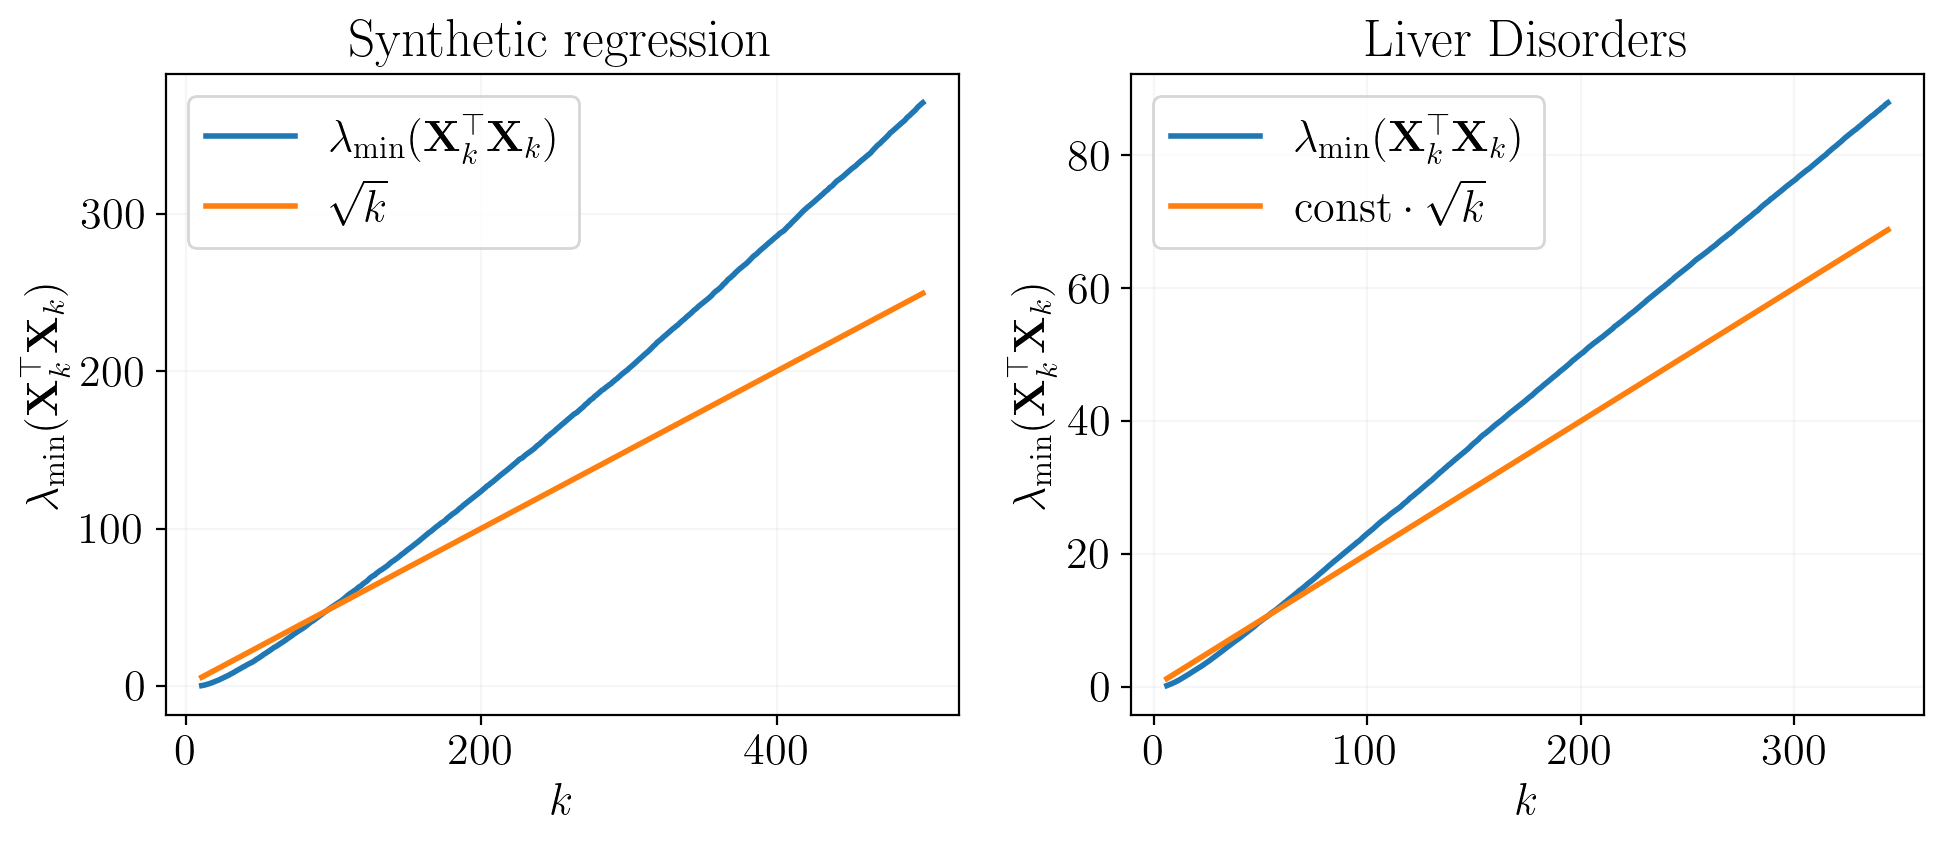

In [109]:
plot_eigvals(sample_sizes_synthetic=sample_sizes_regression[1:][::-1],
             sample_sizes=sample_sizes[1:][::-1],
             eigvals_synthetic=eigvals_regression,
             eigvals=eigvals,
             save=True,
             filename="figs/eigvals.pdf")

Synthetic regression

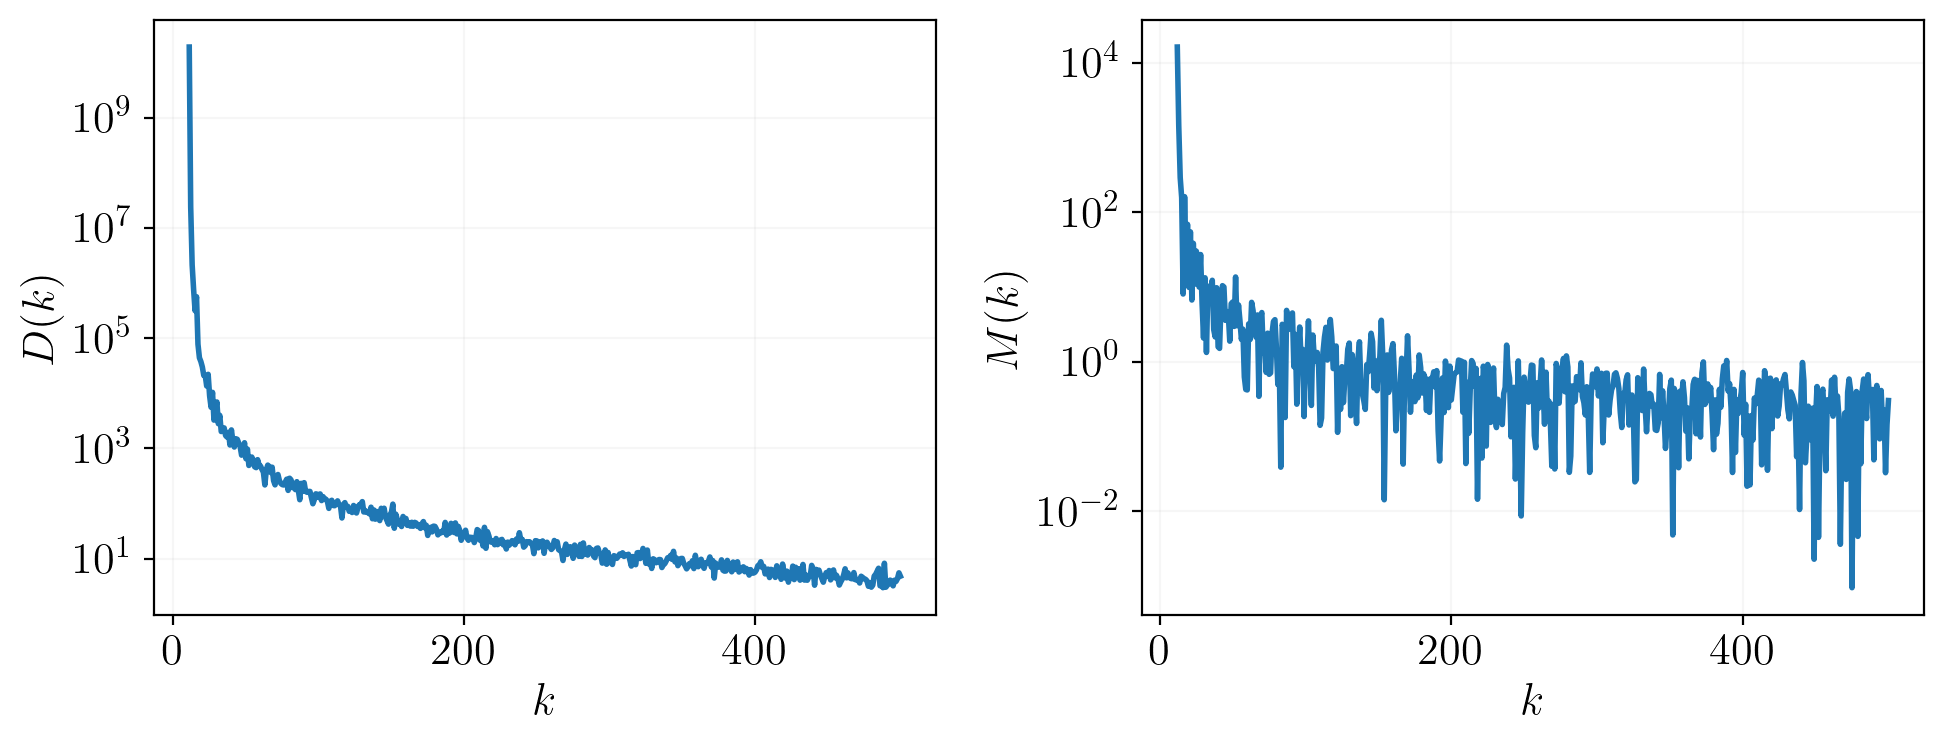

In [110]:
plot_means_variances(sample_sizes_regression, 
                     means_regression, variances_regression,
                     save=True, filename='figs/synthetic-regression.pdf')

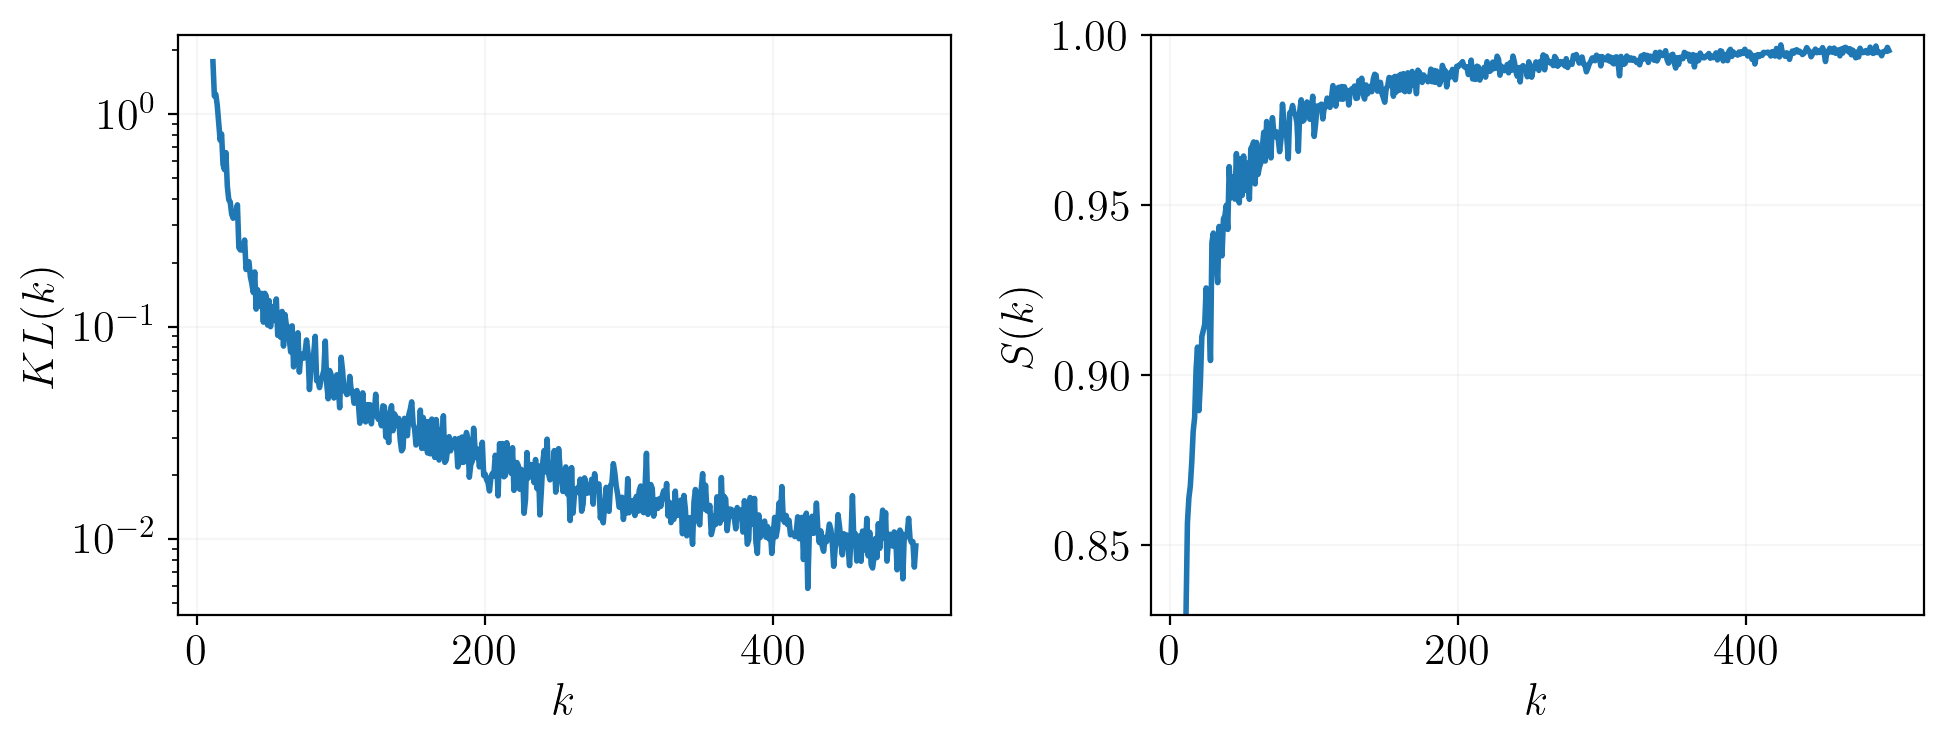

In [111]:
plot_divergences_scores(sample_sizes=sample_sizes_regression[1:][::-1],
                        divergences=divergences_regression,
                        scores=scores_regression,
                        save=True, 
                        filename="figs/synthetic-regression.pdf")

Synthetic classification

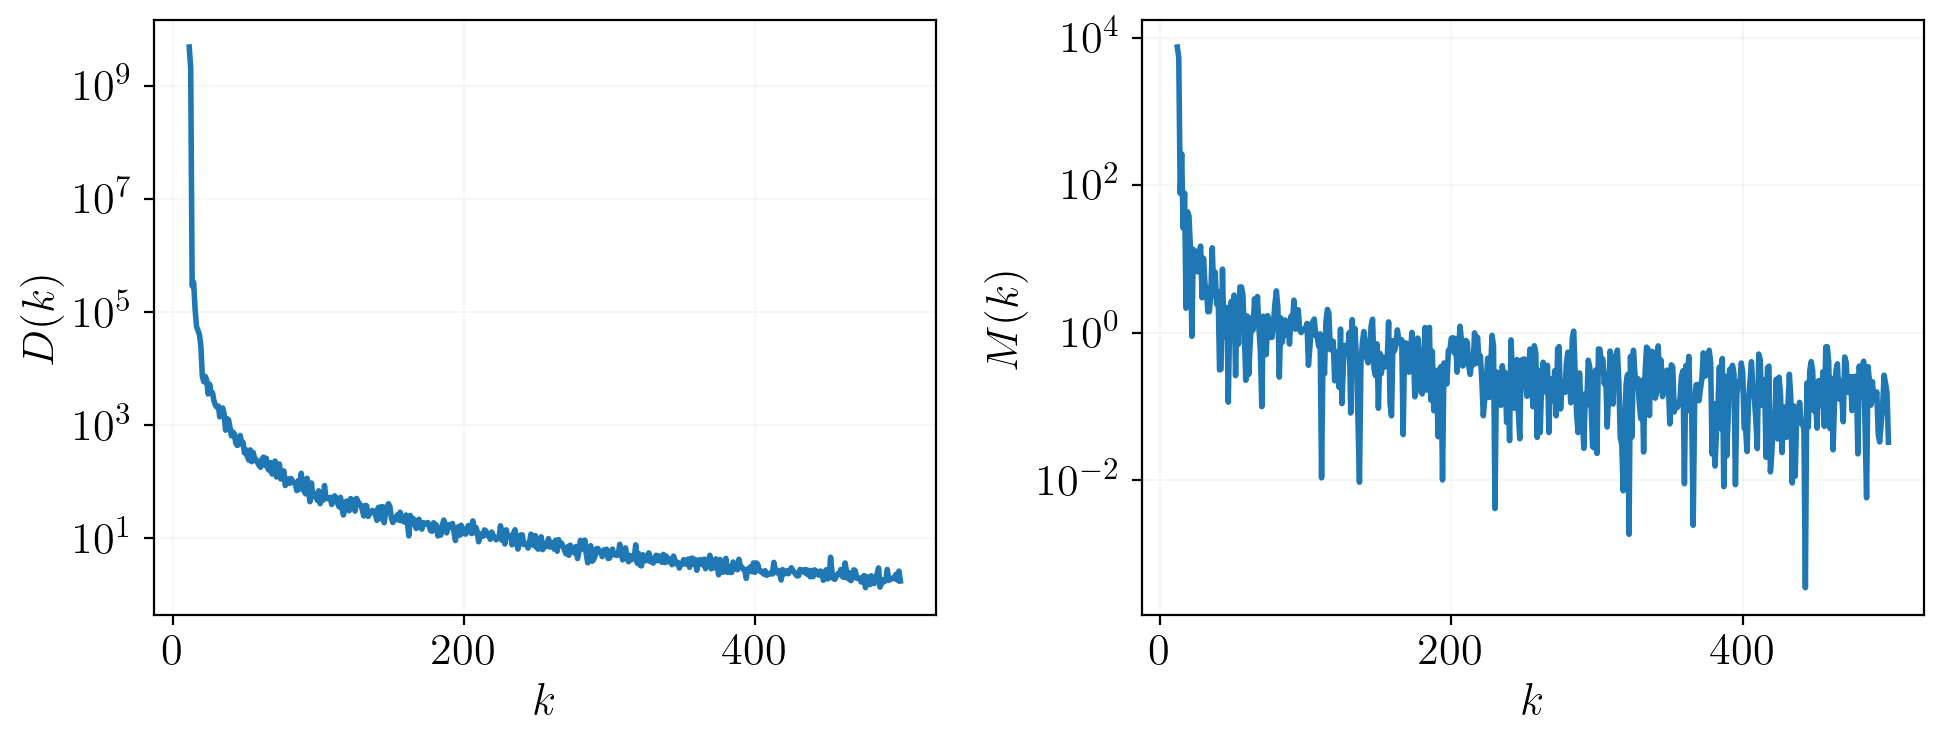

In [112]:
plot_means_variances(sample_sizes_classification, 
                     means_classification, variances_classification,
                     save=True, filename='figs/synthetic-classification.pdf')

Liver Disorders

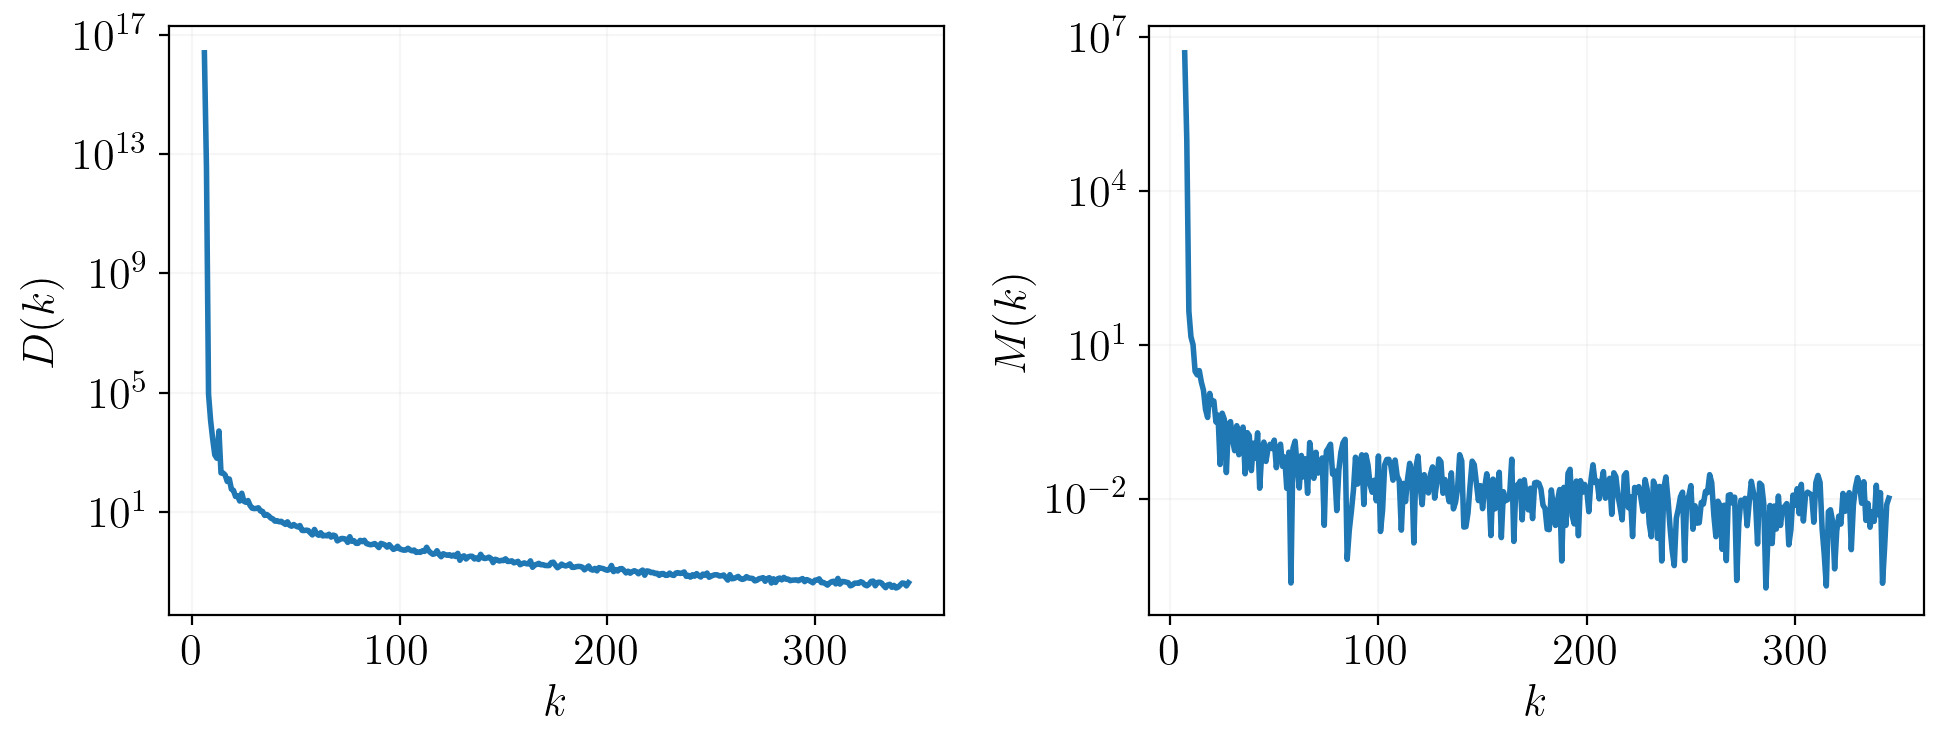

In [113]:
plot_means_variances(sample_sizes, means, variances,
                     save=True, filename='figs/liver-disorders.pdf')

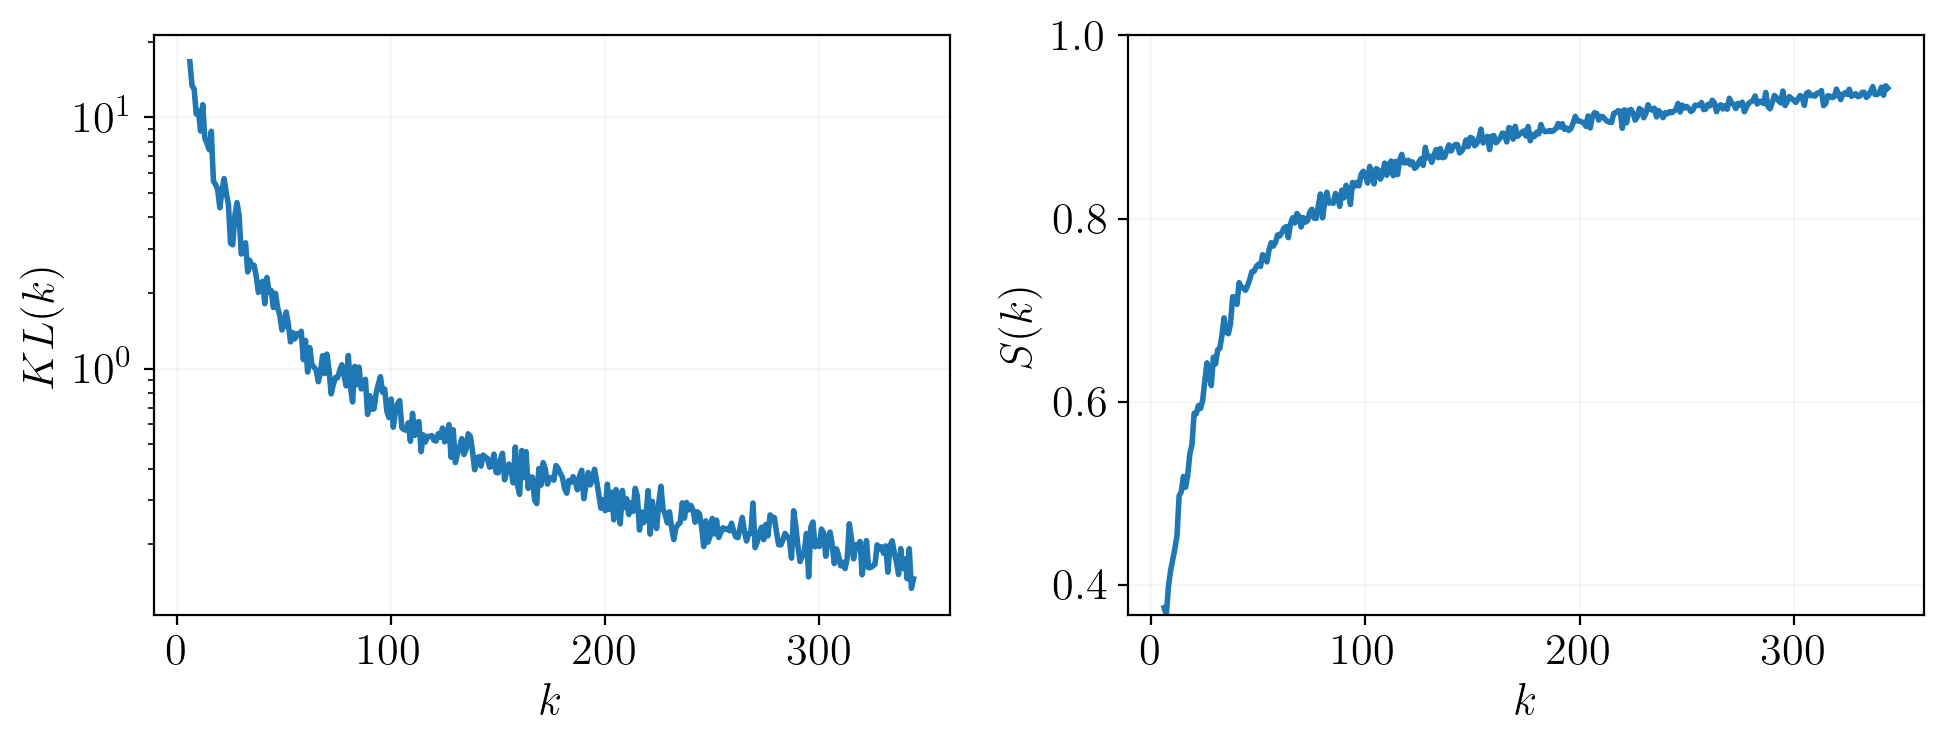

In [115]:
plot_divergences_scores(sample_sizes=sample_sizes[1:][::-1],
                        divergences=divergences,
                        scores=scores,
                        save=True, 
                        filename="figs/liver-disorders.pdf")

Sufficient sample size vs threshold

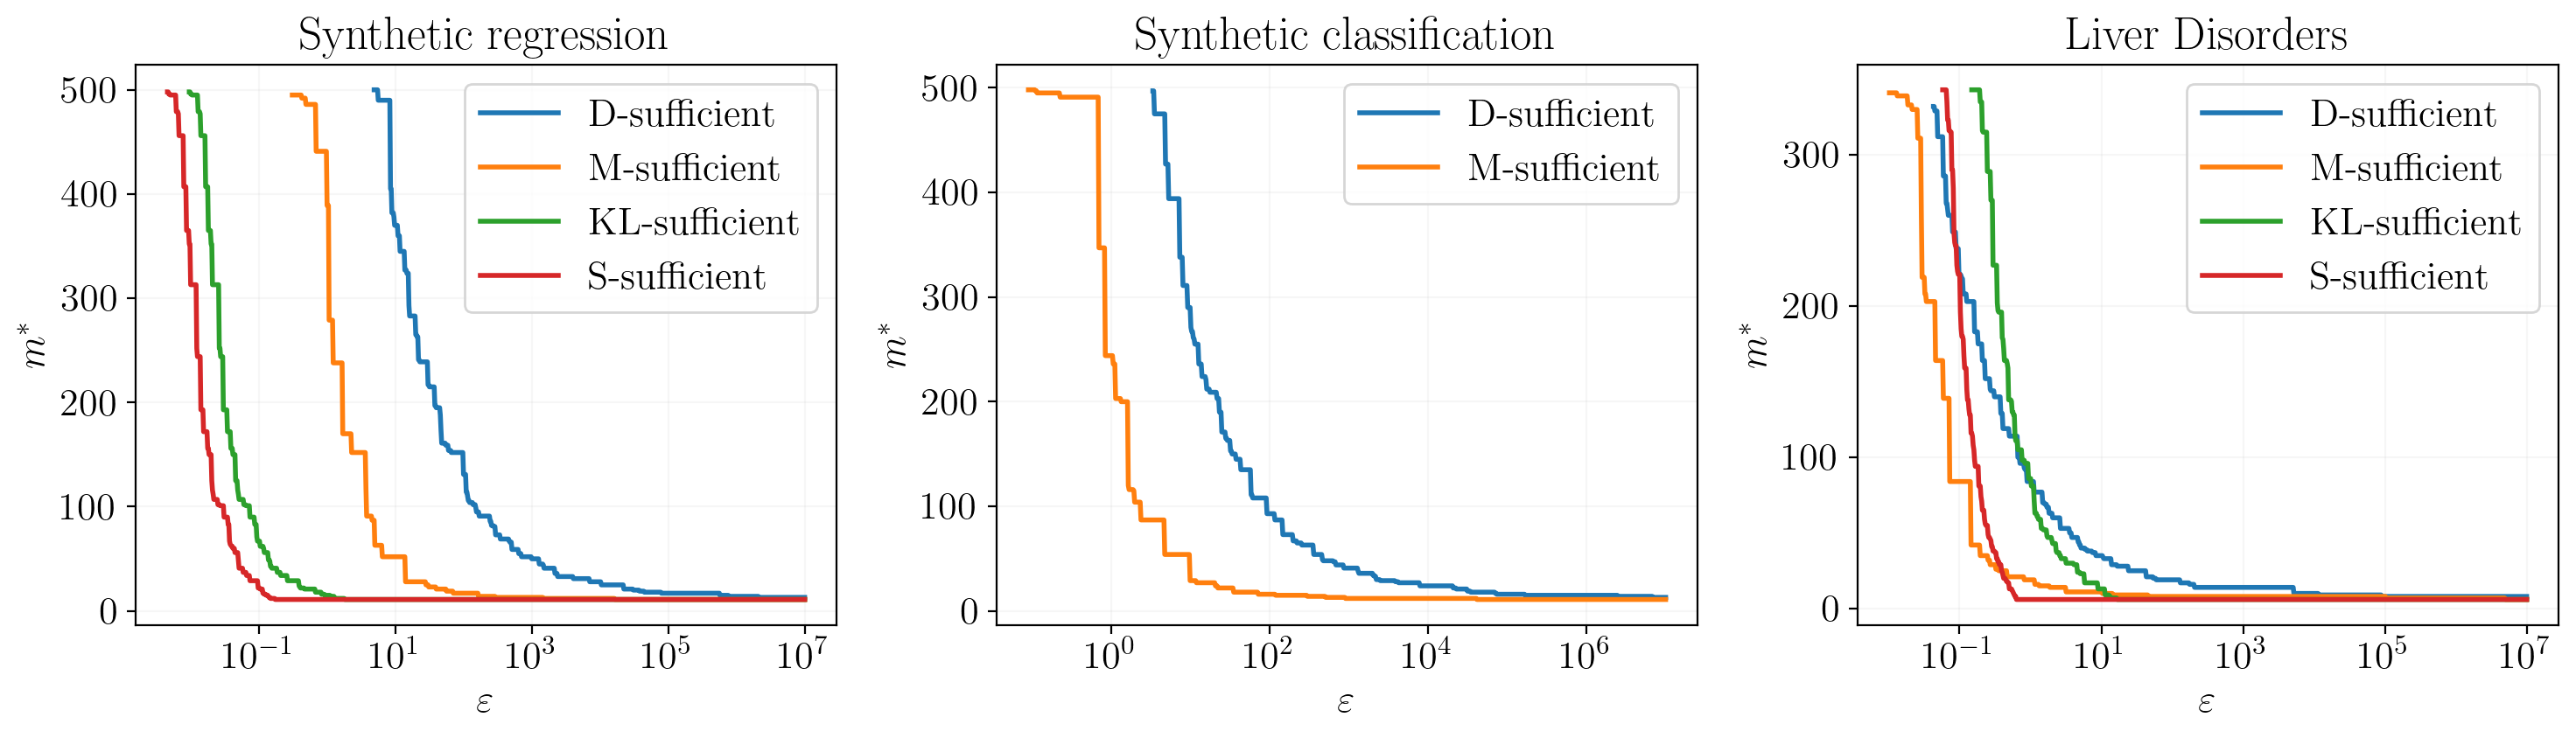

In [188]:
plot_sufficient_vs_threshold(thresholds_regression=thresholds_regression,
                             sufficient_regression=sufficient_regression,
                             thresholds_classification=thresholds_classification,
                             sufficient_classification=sufficient_classification,
                             thresholds=thresholds,
                             sufficient=sufficient,
                             save=True,
                             filename="figs/sufficient-vs-threshold.pdf")